# Kernspinresonanz

## initial imports

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un
import uncertainties.unumpy as unp
from scipy.signal import find_peaks,find_peaks_cwt
import scipy.signal as sig
import scipy.special as sp
import scienceplots
plt.figure()
plt.style.use('science')
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams['text.usetex'] = False # disable latex
plt.rcParams['figure.dpi'] = 150
import os
import fp

<Figure size 640x480 with 0 Axes>

In [2]:
#aliases
from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as ua
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd

In [170]:
# unceratianty from sum
def uavg(x):
    return uf(np.average(x),np.std(x))

In [3]:
outdir = f'plots/kernspin/'
datadir = f'data/kernspin/'
os.makedirs(outdir, exist_ok=True)

In [209]:
files = []
for i in [2,3,4,5,7,8,9,10,12]:
    f = !ls {datadir}{i}/*/*.txt
    # print(f)
    files.append(f)
data = []
for i, subfile in enumerate(files):
    dat = []
    for f in subfile:
        # print(f)
        dat.append(pd.read_csv(f, header=None,))
    data.append(dat)

## Part 2

In [9]:
files2= files[0]
dat2 = data[0]
files2

['data/kernspin/2/FirstFID/fid.txt', 'data/kernspin/2/FirstFID/spectrum.txt']

(1900.0, 2100.0)

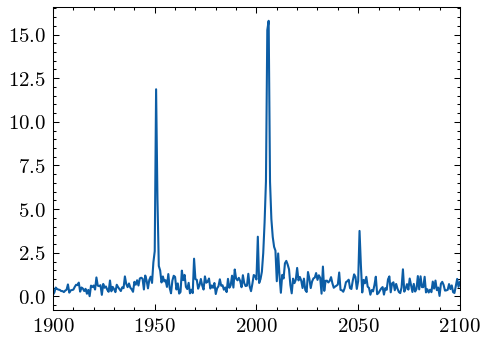

In [204]:
plt.figure()
d = dat2[1]
plt.plot(d[0], d[1])
plt.xlim(1900,2100)

## Part 3

In [11]:
files3= files[1]
dat3 = data[1]
files3

['data/kernspin/3/Noise_Background/fid.txt',
 'data/kernspin/3/Noise_Background/spectrum.txt',
 'data/kernspin/3/Noise_Water/fid.txt',
 'data/kernspin/3/Noise_Water/spectrum.txt']

(0.0, 5000.0)

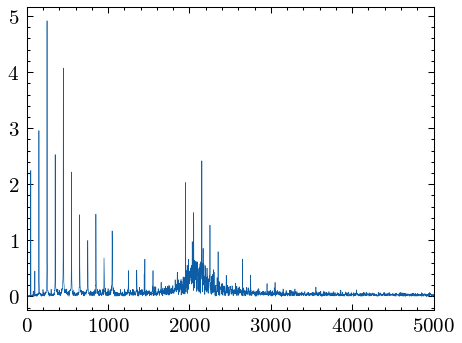

In [205]:
plt.figure()
d=dat3[1]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,5000)

(0.0, 5000.0)

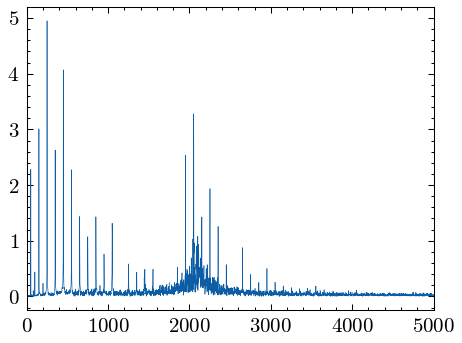

In [203]:
plt.figure()
d=dat3[3]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,5000)

## Part 4

In [50]:
files4= files[2]
dat4 = data[2]
freq_cap = dat4[1::3]
files4

['data/kernspin/4/no_water/fid.txt',
 'data/kernspin/4/no_water/freq-cap.txt',
 'data/kernspin/4/no_water/spectrum.txt',
 'data/kernspin/4/water/fid.txt',
 'data/kernspin/4/water/freq-cap.txt',
 'data/kernspin/4/water/spectrum.txt']

In [153]:
freq_cap[0]

,0,1
0,4.40,2655.21
1,4.45,2645.23
2,4.50,2635.25
3,4.55,2635.25
4,4.60,2625.28
...,...,...
251,16.95,1697.34
252,17.00,1697.34
253,17.05,1687.36
254,17.10,1687.36


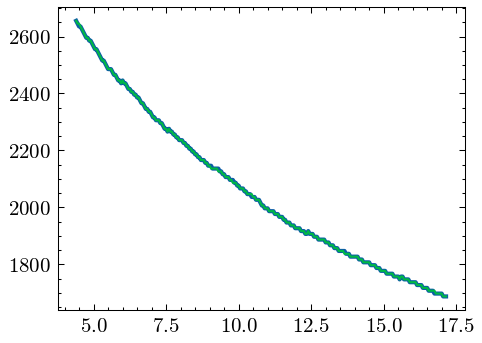

In [157]:
plt.figure()
for fc, lw in zip(freq_cap,[2,1]):
    plt.plot(fc[0], fc[1],lw=lw)

## Part 5

In [17]:
files5= files[3]
dat5 = data[3]
files5

['data/kernspin/5/AutoShim/fid.txt',
 'data/kernspin/5/AutoShim/iteration.txt',
 'data/kernspin/5/AutoShim/spectrum.txt',
 'data/kernspin/5/B1DurationFast/ampl-b1.txt',
 'data/kernspin/5/C_opt_1/fid.txt',
 'data/kernspin/5/C_opt_1/spectrum.txt',
 'data/kernspin/5/C_opt_2/fid.txt',
 'data/kernspin/5/C_opt_2/spectrum.txt',
 'data/kernspin/5/C_opt_3/fid.txt',
 'data/kernspin/5/C_opt_3/spectrum.txt',
 'data/kernspin/5/FID/fid.txt',
 'data/kernspin/5/FID/spectrum.txt']

(1500.0, 2500.0)

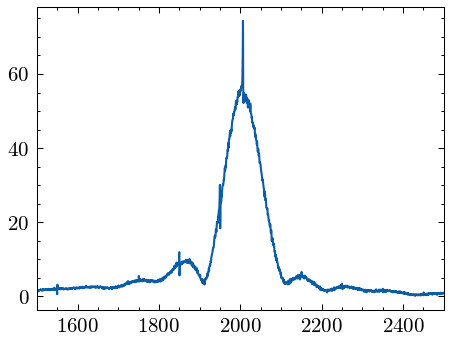

In [249]:
plt.figure()
d= dat5[9]
plt.plot(d[0], d[1])
plt.xlim(1500,2500)

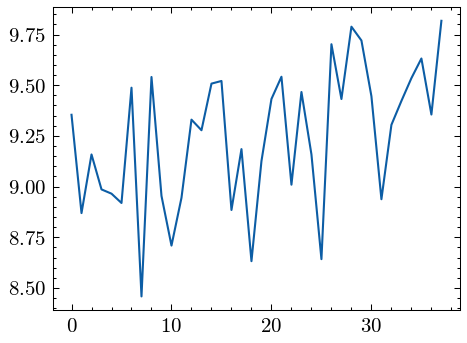

In [235]:
plt.figure()
d= dat5[1]
plt.plot(d[0], d[1])

<ErrorbarContainer object of 3 artists>

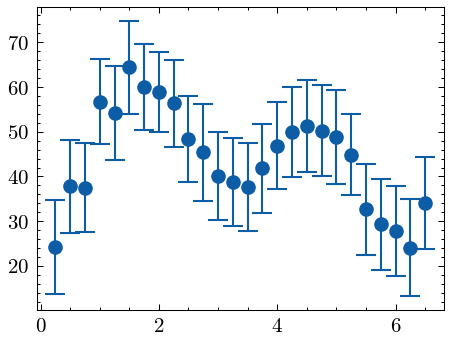

In [159]:
plt.figure()
d= dat5[3]
plt.errorbar(d[0], d[1],d[2],fmt='o')


## Part 7

In [19]:
files7= files[4]
dat7 = data[4]
files7

['data/kernspin/7/FID_long/fid.txt',
 'data/kernspin/7/FID_long/spectrum.txt',
 'data/kernspin/7/FID_short/fid.txt',
 'data/kernspin/7/FID_short/spectrum.txt']

(0.0, 4000.0)

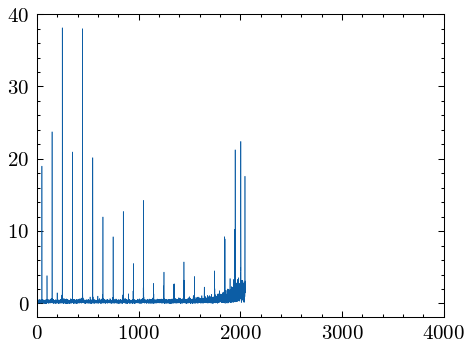

In [232]:
plt.figure()
# long
d=dat7[1]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,4000)

(0.0, 4000.0)

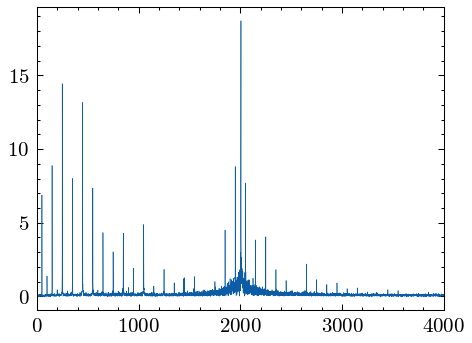

In [231]:
plt.figure()
# short
d=dat7[3]
plt.plot(d[0], d[1],lw=0.3)
plt.xlim(0,4000)

## Part 8

In [166]:
files8= files[5]
dat8 = data[5]
files8

['data/kernspin/8/T1-Bp-long/data.txt',
 'data/kernspin/8/T1-Bp-long/t1_fit.txt',
 'data/kernspin/8/T1-Bp-long/t1.txt',
 'data/kernspin/8/T1-Bp-short/data.txt',
 'data/kernspin/8/T1-Bp-short/T1_fit.txt',
 'data/kernspin/8/T1-Bp-short/T1.txt',
 'data/kernspin/8/T1-Bp-short/test.txt']

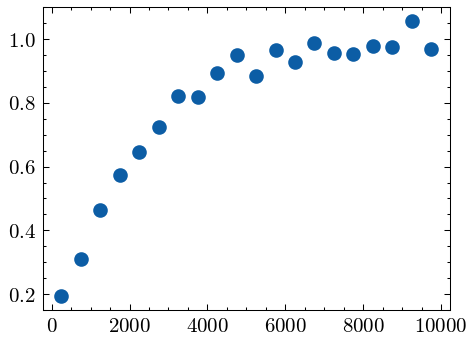

In [167]:
plt.figure()
d = dat8[2]
plt.scatter(d[0],d[1])

## Part 9

In [206]:
files9= !ls {datadir}9/*/spin-echo-results.txt
dat9=[]
for f in files9:
    dat9.append(pd.read_csv(f,sep='\s+'))
files9


['data/kernspin/9/Echo-higher-x/spin-echo-results.txt',
 'data/kernspin/9/Echo-lower-x/spin-echo-results.txt',
 'data/kernspin/9/Echo-optimal/spin-echo-results.txt']

In [173]:
i = 0
uavg(dat9[i]['Max']),uavg(dat9[i]['Integral'])

(1.788888888888889+/-0.5704665623552638,
 10.388888888888891+/-1.6168862012072218)

In [190]:

def print_spin_echo_table(i):
    print(r"\begin{tabular}{|l|l|}")
    print(r"\hline")
    print(r"\textbf{Amplitude} & \textbf{Integral} \\ \hline")
    d = dat9[i]
    for amp, integ in zip(d['Max'],d['Integral']):
        print(fr'\num{{{amp}}} & \num{{{integ}}} \\ \hline')
    print(r"\hline")
    print(fr"\num{{{uavg(d['Max']):L}}} &\num{{{uavg(d['Integral']):L}}} \\ \hline")
    print(r"\end{tabular}")
#higher
print_spin_echo_table(0)

\begin{tabular}{|l|l|}
\hline
\textbf{Amplitude} & \textbf{Integral} \\ \hline
\num{3.1} & \num{14.2} \\ \hline
\num{2.4} & \num{10.9} \\ \hline
\num{1.9} & \num{10.1} \\ \hline
\num{1.7} & \num{10.9} \\ \hline
\num{1.6} & \num{10.3} \\ \hline
\num{1.4} & \num{8.4} \\ \hline
\num{1.4} & \num{8.3} \\ \hline
\num{1.3} & \num{10.2} \\ \hline
\num{1.3} & \num{10.2} \\ \hline
\hline
\num{1.8 \pm 0.6} &\num{10.4 \pm 1.6} \\ \hline
\end{tabular}


In [191]:
#lower
print_spin_echo_table(1)

\begin{tabular}{|l|l|}
\hline
\textbf{Amplitude} & \textbf{Integral} \\ \hline
\num{2.5} & \num{11.8} \\ \hline
\num{1.8} & \num{9.4} \\ \hline
\num{1.6} & \num{8.1} \\ \hline
\num{1.4} & \num{7.6} \\ \hline
\num{1.3} & \num{7.3} \\ \hline
\num{1.2} & \num{7.1} \\ \hline
\num{1.1} & \num{7.9} \\ \hline
\num{1.2} & \num{8.2} \\ \hline
\num{1.3} & \num{8.3} \\ \hline
\hline
\num{1.5 \pm 0.4} &\num{8.4 \pm 1.4} \\ \hline
\end{tabular}


In [192]:
#optimal
print_spin_echo_table(2)

\begin{tabular}{|l|l|}
\hline
\textbf{Amplitude} & \textbf{Integral} \\ \hline
\num{16.2} & \num{24.9} \\ \hline
\num{16.1} & \num{22.5} \\ \hline
\num{15.4} & \num{22.0} \\ \hline
\num{14.6} & \num{21.8} \\ \hline
\num{14.3} & \num{20.5} \\ \hline
\num{13.5} & \num{19.6} \\ \hline
\num{12.4} & \num{18.7} \\ \hline
\num{10.8} & \num{18.4} \\ \hline
\num{9.6} & \num{18.7} \\ \hline
\hline
\num{13.7 \pm 2.2} &\num{20.8 \pm 2.1} \\ \hline
\end{tabular}


## Part 10

In [218]:
files10= files[7]
dat10 = data[7]
t2_10 = dat10[3::4]
alpha = [0,0,0,180,90,90]
beta =  [0,180,90,0,0,270]
files10[3::8]

['data/kernspin/10/CPMG-0-0-alternating/t2.txt',
 'data/kernspin/10/CPMG-0-180-alternating/t2.txt',
 'data/kernspin/10/CPMG-0-90-alternating/t2.txt',
 'data/kernspin/10/CPMG-180-0-alternating/t2.txt',
 'data/kernspin/10/CPMG-90-0-alternating/t2.txt',
 'data/kernspin/10/CPMG-90-270-alternating/t2.txt']

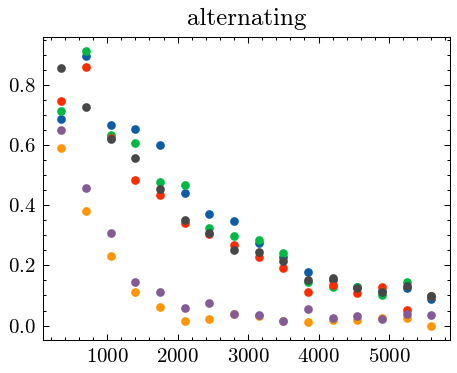

In [222]:
plt.figure()
for t2 in t2_10[::2]:
    # amp = ua(t2[1],t2[2])
    plt.title('alternating')
    plt.scatter(t2[0],t2[1],s=10)

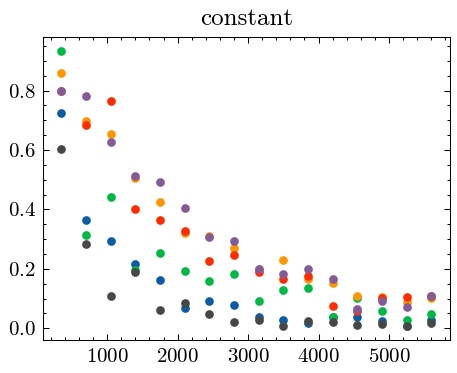

In [223]:
plt.figure()
for t2 in t2_10[1::2]:
    # amp = ua(t2[1],t2[2])
    plt.title('constant')
    plt.scatter(t2[0],t2[1],s=10)

## Part 11

In [92]:
files11 = !ls {datadir}/11/*/*.txt
for f in files11[1::7]+files11[3::7]+files11[5::7]:
    files11.remove(f)
files11=files11[8:]+ files11[:8]
files11

['data/kernspin//11/250uM_FID/fid.txt',
 'data/kernspin//11/250uM_FID/spectrum.txt',
 'data/kernspin//11/250uM_T1-Bp/t1.txt',
 'data/kernspin//11/250uM_T2/t2.txt',
 'data/kernspin//11/500uM_FID/fid.txt',
 'data/kernspin//11/500uM_FID/spectrum.txt',
 'data/kernspin//11/500uM_T1-Bp/t1.txt',
 'data/kernspin//11/500uM_T2/t2.txt',
 'data/kernspin//11/1000uM_FID/fid.txt',
 'data/kernspin//11/1000uM_FID/spectrum.txt',
 'data/kernspin//11/1000uM_T1-Bp/t1.txt',
 'data/kernspin//11/1000uM_T2/t2.txt',
 'data/kernspin//11/2000uM_FID/fid.txt',
 'data/kernspin//11/2000uM_FID/spectrum.txt',
 'data/kernspin//11/2000uM_T1-Bp/t1.txt',
 'data/kernspin//11/2000uM_T2/t2.txt']

In [124]:
dat11 = []
for i, f in enumerate(files11):
    dat11.append(pd.read_csv(f, header=None,))

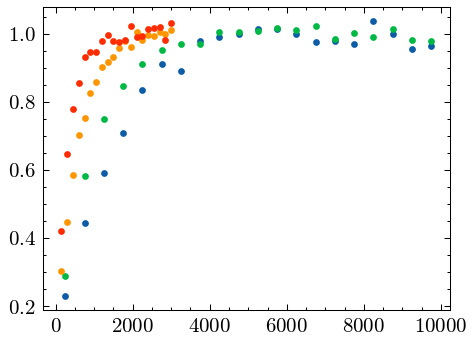

In [134]:
# t1
plt.figure()
for d in dat11[2::4]:
    plt.scatter(d[0],d[1],s=5)

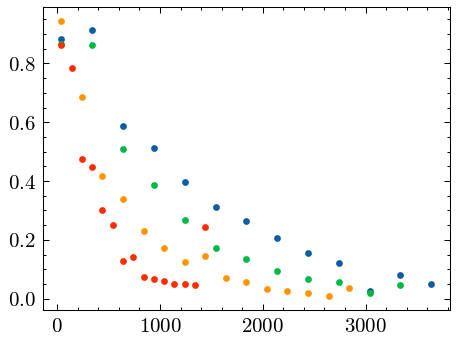

In [135]:
# t2
plt.figure()
for d in dat11[3::4]:
    plt.scatter(d[0],d[1],s=5)

## Part 12

In [48]:
files12= files[8]
dat12 = data[8]
decim = dat12[::2]
magn = dat12[1::2]
files12

['data/kernspin/12/1D_Phantom_X/decim.txt',
 'data/kernspin/12/1D_Phantom_X/magnitude.txt',
 'data/kernspin/12/1D_Phantom_Y/decim.txt',
 'data/kernspin/12/1D_Phantom_Y/magnitude.txt',
 'data/kernspin/12/1D_Phantom_Z/decim.txt',
 'data/kernspin/12/1D_Phantom_Z/magnitude.txt']

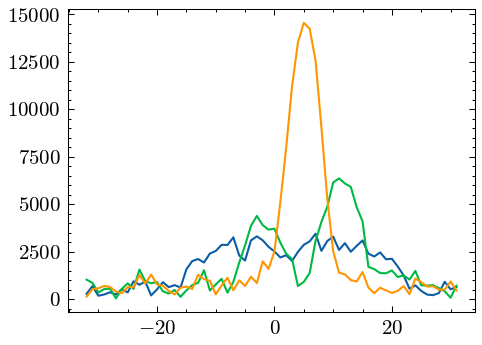

In [123]:
for m in magn:
    plt.plot(m[0],m[1])

## Part 13

In [119]:
files13 = !ls {datadir}13/*/*.txt
files13[::2]

['data/kernspin/13/2D_Phantom_YZ_100pd_200et_small_fov/kspace.txt',
 'data/kernspin/13/2D_Phantom_YZ_2000pd_200et_small_fov/kspace.txt',
 'data/kernspin/13/2D_Phantom_YZ_5000pd_200et/kspace.txt',
 'data/kernspin/13/2D_Phantom_YZ_5000pd_55et_small_fov/kspace.txt',
 'data/kernspin/13/2D_Phantom_YZ_500pd_200et/kspace.txt',
 'data/kernspin/13/2D_Phantom_YZ_500pd_200et_small_fov/kspace.txt',
 'data/kernspin/13/2D_Phantom_YZ_500pd_55et_small_fov/kspace.txt']

In [100]:
dat13 = []
for f in files13:
    dat13.append(np.loadtxt(f))

array([[-6.71409e+01, -8.80474e+02, -3.10961e+02, -9.99749e+02,
         1.33140e+02,  2.34268e+02, -3.08810e+02, -1.87091e+02,
        -1.22740e+02,  1.29719e+02, -5.57461e+02,  1.90480e+02,
        -7.89063e+01, -7.66298e+02,  7.50601e+02,  8.10034e+01,
        -1.12171e+00,  4.12425e+02,  1.32324e+02, -8.30166e+02,
         7.98101e+01,  5.47026e+02,  2.84104e+02, -8.44411e+02,
         7.43503e+02,  4.62905e+02, -5.75088e+01,  3.69947e+02,
         9.09721e+02,  1.46700e+02,  5.42124e+02, -8.70510e+02],
       [ 3.83862e+02,  2.32361e+02,  1.13433e+01, -5.10800e+01,
        -2.77258e+02,  1.81922e+02,  2.31303e+02,  6.39122e+02,
         3.26564e+02,  7.49154e+01,  4.19262e+02,  1.19344e+01,
        -5.43295e+02,  1.47682e+02, -5.05025e+02,  2.85995e+02,
        -8.18698e+01,  3.24102e+02,  3.08882e+02,  1.21972e+02,
         6.41664e+02,  9.20722e+02,  3.36305e+02,  7.49458e+02,
         1.59994e+02,  1.55283e+02, -7.09268e+02, -2.45841e+01,
        -5.62108e+02, -1.34232e+02, -4.